<a href="https://colab.research.google.com/github/tajain07/neural-network-playground/blob/master/High_pass_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from PIL import Image
import requests
from io import BytesIO
import matplotlib.image as mpimg


In [0]:
url="http://img5a.flixcart.com/image/car-sticker/t/t/p/lord-shiva-walldesign-1-400x400-imae3d2quhfhbghf.jpeg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))


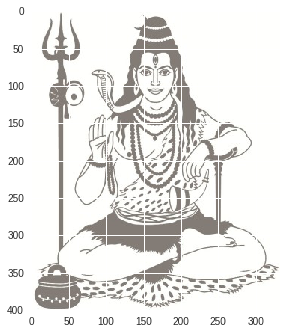

In [46]:
#im = Image.open('img_gray.png')
data = np.array(img, dtype=float)

data /= 255.0

#print(data)
#print(data.shape)
#plt.gray()
plt.imshow(data)
#plot(data, 'Original')

(3, 3, 3)


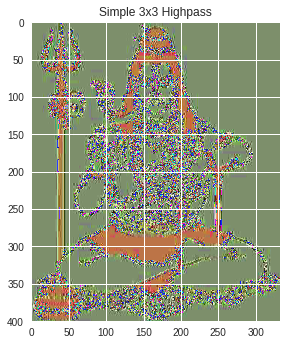

In [47]:
# A very simple and very narrow highpass filter
kernel = np.array([[[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]],]*3)

print(kernel.shape)
highpass_3x3 = ndimage.convolve(data, kernel)

highpass_3x3 += (255.0/highpass_3x3.max())

#print(highpass_3x3)
#print(highpass_3x3.shape)
plt.title('Simple 3x3 Highpass')
plt.imshow(highpass_3x3 )



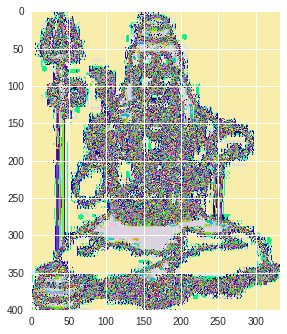

In [75]:
# A slightly "wider", but sill very simple highpass filter 

kernel = np.array([[[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]],]*3)

#print(kernel.shape)
highpass_5x5 = ndimage.convolve(data, kernel)

highpass_5x5 += (255.0/highpass_5x5.max())

plt.imshow(highpass_5x5 )


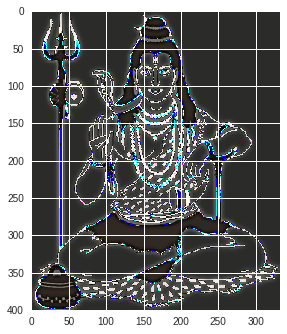

In [76]:
# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass

gauss_highpass += (255.0/gauss_highpass.max())


plt.imshow(gauss_highpass)